In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## EDA IMDB Ratings

#### Goals

- Get descriptive statistics for imdb tv shows ratings for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Netflix
#### i. Import data

In [2]:
netflix = pd.read_pickle("../Data/netflix_final_clean.pkl")

In [3]:
netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller"
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror"
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama"
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy


In [4]:
netflix["imdb_rating"].isna().sum()

56

Since the information for imdb_rating column was obtained from web scraping, we will now join the ratings table from IMDB Database in order to get all the correct values for imdb_ratings.

In [5]:
ratings = pd.read_csv("C:/Users/Admin/Documents/ironhack/title.ratings.tsv.gz", sep="\t")

In [6]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1294
3,tt0000004,6.1,121
4,tt0000005,6.1,2066


Since we will just be analyzing averageRating, we will drop numVotes column.

In [7]:
ratings = ratings.drop(columns="numVotes")

We will join both tables by imdb_id and tconst.

In [8]:
netflix = netflix.merge(ratings, how="left", left_on="imdb_id", right_on="tconst")

In [9]:
netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,tconst,averageRating
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller",tt0903747,9.5
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror",tt4574334,8.8
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery",tt1475582,9.1
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama",tt3032476,8.7
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy,tt0386676,8.9


In [10]:
netflix["averageRating"].isna().sum()

19

In [11]:
1 - (netflix["averageRating"].isna().sum() / len(netflix))

0.9883934025656689

Now we have less null values for imdb ratings, now we will reate a data frame which will have only the show names and ratings.

In [12]:
netflix_ratings = netflix[["show", "averageRating"]]

#### ii. Descriptive Statistics

In [13]:
netflix_ratings["averageRating"].describe()

count    1618.000000
mean        7.193387
std         1.068970
min         1.800000
25%         6.600000
50%         7.400000
75%         8.000000
max         9.500000
Name: averageRating, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by netflix have 7.19 as an average rating.
- 25% of the tv shows have 6.6 or lower as average rating.
- 50% of the tv shows have 7.4 or higher average rating.
- 25% of the tv shows have 8.0 or higher as average rating.


#### iii. Plotting

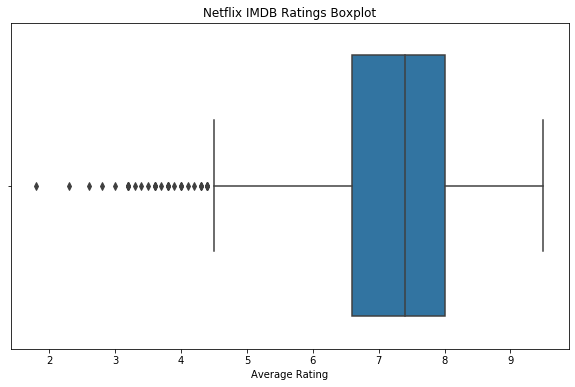

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix_ratings["averageRating"])
ax.set_title("Netflix IMDB Ratings Boxplot")
ax.set_xlabel("Average Rating");

From the box plot we can clearly see how most of the tv shows have between 6.5 and 8 as an average rating. There are some outliers that have less than around 4.7 average rating up unitl 1.07, the minimum value.

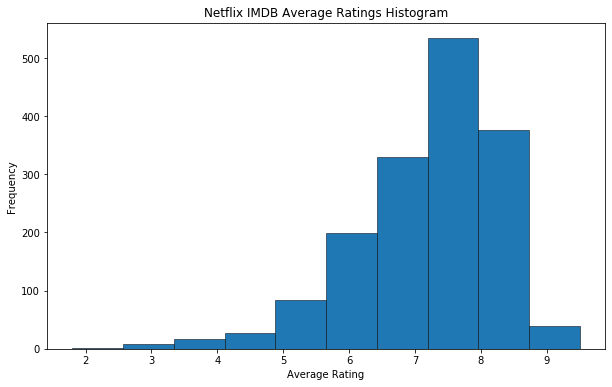

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(netflix_ratings["averageRating"], ec="black", lw=0.5)
ax.set_title("Netflix IMDB Average Ratings Histogram")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Frequency");

The histogram above is left skewed, most of the tv shows provided by Netflix, as stated previously, have average ratings between 7 and 8, and very few have a rating lower than 5.

-----

### 2. Amazon
#### i. Import data

In [17]:
amazon = pd.read_pickle(path + "Data/amazon_final_clean.pkl")

In [18]:
amazon.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Wire,2002,18.0,9.3,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
1,The Sopranos,1999,18.0,9.2,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
2,Band of Brothers,2001,18.0,9.4,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"
3,Vikings,2013,18.0,8.6,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
4,Mr. Robot,2015,18.0,8.5,tt4158110,tvSeries,Mr. Robot,Mr. Robot,2015.0,2015.0,49.0,"Crime,Drama,Thriller"


In [19]:
amazon["imdb_rating"].isna().sum()

228

Same as Netflix, we will merge the averageRating column from the ratings IMDB table in order to get the most complete data set.

In [20]:
amazon = amazon.merge(ratings, how="left", left_on="imdb_id", right_on="tconst")

In [21]:
amazon["averageRating"].isna().sum()

107

In [22]:
1 - (amazon["averageRating"].isna().sum() / len(amazon))

0.9170542635658915

In [23]:
amazon_ratings = amazon[["show", "averageRating"]]

#### ii. Descriptive Statistics

In [24]:
amazon_ratings["averageRating"].describe()

count    1183.000000
mean        7.184531
std         1.137734
min         1.800000
25%         6.600000
50%         7.400000
75%         8.000000
max         9.500000
Name: averageRating, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by amazon have 7.18 as an average rating.
- 25% of the tv shows have 6.6 or lower as average rating.
- 50% of the tv shows have 7.4 or higher average rating.
- 25% of the tv shows have 8.0 or higher as average rating.

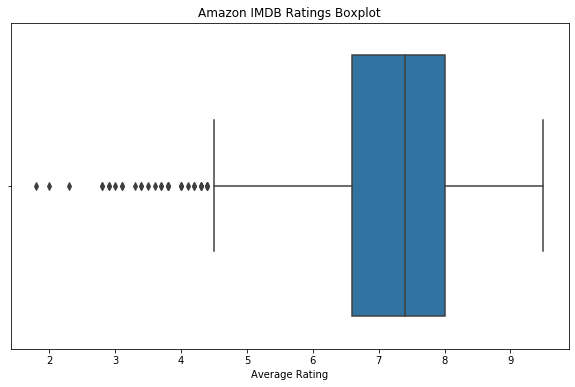

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon_ratings["averageRating"])
ax.set_title("Amazon IMDB Ratings Boxplot")
ax.set_xlabel("Average Rating");

From the box plot we can clearly see how most of the tv shows have between 6.5 and 8 as an average rating. There are some outliers that have less than around 4.5 average rating up until 1.8, the minimum value. Very similar to Netflix data.

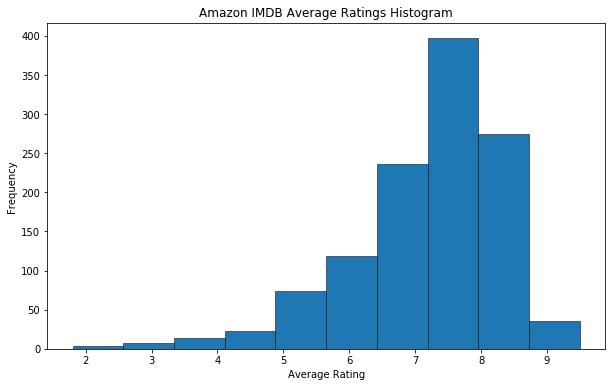

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(amazon_ratings["averageRating"], ec="black", lw=0.5)
ax.set_title("Amazon IMDB Average Ratings Histogram")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Frequency");

Same as for Netflix, the histogram above is left skewed, most of the tv shows provided by Amazon have average ratings between 7 and 8, and very few have a rating lower than 5.

-----

### 3. HBO
#### i. Import data

In [28]:
hbo = pd.read_pickle(path + "Data/hbo_final_clean.pkl")

In [29]:
hbo.head()

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Game of Thrones,2011,18.0,9.3,tt0944947,tt0944947,tvSeries,Game of Thrones,Game of Thrones,2011.0,2011.0,57.0,"Action,Adventure,Drama"
1,The Wire,2002,18.0,9.3,tt0306414,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
2,Chernobyl,2019,18.0,9.4,tt7366338,tt7366338,tvMiniSeries,Chernobyl,Chernobyl,2019.0,2019.0,330.0,"Drama,History,Thriller"
3,The Sopranos,1999,18.0,9.2,tt0141842,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
4,Band of Brothers,2001,18.0,9.4,tt0185906,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"


In [30]:
hbo["imdb_rating"].isna().sum()

5

In [31]:
hbo = hbo.merge(ratings, how="left", left_on="imdb_id", right_on="tconst")

In [32]:
hbo["averageRating"].isna().sum()

1

In [33]:
1 - (hbo["averageRating"].isna().sum() / len(hbo))

0.9941860465116279

In [34]:
hbo_ratings = hbo[["show", "averageRating"]]

#### ii. Descriptive Statistics

In [35]:
hbo_ratings["averageRating"].describe()

count    171.000000
mean       7.588889
std        0.923576
min        4.800000
25%        7.100000
50%        7.700000
75%        8.300000
max        9.400000
Name: averageRating, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by hbo have 7.58 as an average rating.
- 25% of the tv shows have 7.1 or lower as average rating.
- 50% of the tv shows have 7.7 or higher average rating.
- 25% of the tv shows have 8.3 or higher as average rating.


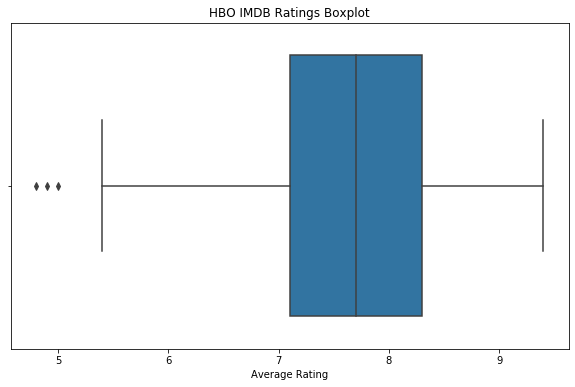

In [36]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo_ratings["averageRating"])
ax.set_title("HBO IMDB Ratings Boxplot")
ax.set_xlabel("Average Rating");

From the box plot we can clearly see how most of the tv shows have between 7 and 8.3 as an average rating, higher than Netflix and Amazon. There are some outliers that have less than around 5.2 average rating, up until 4.8, which is the minimum value.

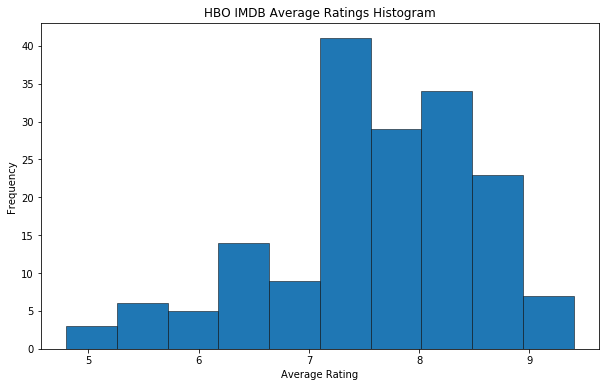

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hbo_ratings["averageRating"], ec="black", lw=0.5)
ax.set_title("HBO IMDB Average Ratings Histogram")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Frequency");

The histogram above shows more values ranging from 7 up until 9. Higher than for Netflix and Amazon.

-----

### 4. Comparison

- Netflix and Amazon seem to have very similar ratings, both having 1.8 as a minimum and 9.5 as a maximum average rating. Half of their tv shows have 7.4 or higher average rating. Most of their ratings range from 7 and 8.
- HBO has higher average ratings than Netflix and Amazon. It has 4.8 as a minimum and 9.4 as a maximum. Most of its ratings range between 7 and 9.
- It seems that HBO has higher average ratings in general than Netflix and Amazon.